In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper
import matplotlib.pyplot as plt

In [2]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [3]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                ])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64 , shuffle = True)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


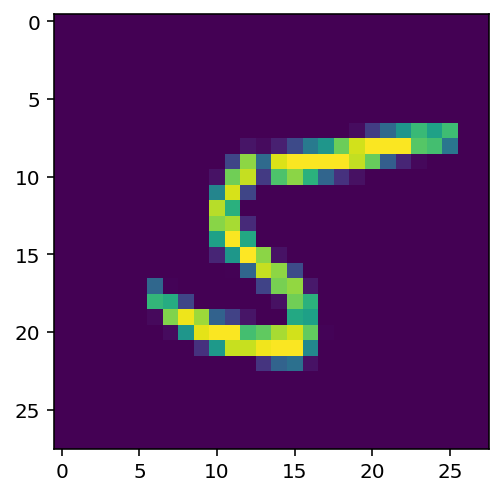

In [5]:
plt.imshow(images[1].numpy().squeeze());

In [6]:
def activation(x):
  return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0],-1)
w1 = torch.randn(784,256)
b1 = torch.randn(256)
w2 = torch.randn(256,10)
b2 = torch.randn(10)
h = activation(torch.matmul(inputs, w1)+b1)
out = activation(torch.matmul(h, w2)+b2)

In [7]:
probabilities = torch.exp(out)/ torch.sum(torch.exp(out), dim =1).view(-1,1)
print(probabilities)

tensor([[0.1156, 0.1166, 0.1123, 0.0581, 0.1166, 0.0878, 0.0431, 0.1166, 0.1166,
         0.1166],
        [0.1151, 0.1224, 0.0492, 0.1223, 0.1224, 0.1224, 0.0576, 0.0451, 0.1223,
         0.1211],
        [0.1074, 0.1086, 0.1079, 0.1086, 0.1087, 0.1006, 0.0400, 0.1073, 0.1024,
         0.1087],
        [0.1388, 0.1387, 0.1389, 0.0511, 0.1389, 0.0925, 0.0602, 0.0511, 0.0511,
         0.1387],
        [0.0630, 0.1520, 0.1520, 0.0559, 0.1520, 0.0602, 0.0560, 0.0559, 0.1020,
         0.1510],
        [0.1391, 0.1394, 0.1394, 0.0601, 0.1394, 0.0521, 0.0661, 0.0518, 0.0733,
         0.1394],
        [0.0539, 0.1449, 0.1449, 0.0534, 0.1449, 0.0751, 0.0534, 0.0533, 0.1313,
         0.1449],
        [0.0968, 0.1386, 0.0607, 0.0580, 0.1386, 0.1313, 0.0510, 0.0513, 0.1383,
         0.1353],
        [0.1242, 0.1243, 0.1204, 0.1241, 0.1243, 0.0505, 0.0457, 0.0459, 0.1164,
         0.1243],
        [0.1316, 0.0511, 0.1332, 0.1329, 0.1332, 0.1207, 0.0490, 0.0492, 0.0659,
         0.1332],
        [0

In [8]:
print(probabilities.sum())

tensor(64.)


In [9]:
print(probabilities.sum(dim = 0)) #adds all rows column wise

tensor([7.2568, 7.5073, 7.1445, 5.4028, 8.4143, 5.7177, 3.4778, 4.9513, 5.8278,
        8.2997])


In [10]:
print(probabilities.sum(dim = 1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [11]:
print(probabilities.shape)

torch.Size([64, 10])


In [12]:
from  torch import nn

In [13]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,256)
    self. output = nn.Linear(256,10)
    self.sigmoid = nn.Sigmoid
    self.softmax = nn.Softmax(dim =1)

  def forward(self, x):
    x= self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

In [14]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

[This link will take you to the reason why in softmax dim=1 is used](https://www.programmersought.com/article/52634648126/)
<br>
[See this reference also for better understanding](https://stackoverflow.com/questions/49036993/pytorch-softmax-what-dimension-to-use)

In [15]:
import torch.nn.functional as F

class Network1(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,256) 
    self.output = nn.Linear(256,10)

  def forward(self,x):
    x  = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim =1)
    return x

In [16]:
#Exercise 1
class Network2(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.out = nn.Linear(64,10)
  
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.out(x), dim=1)
    return x

model = Network2()
model

Network2(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [17]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0296,  0.0134,  0.0106,  ...,  0.0086,  0.0120,  0.0254],
        [-0.0232, -0.0046,  0.0340,  ..., -0.0336, -0.0267, -0.0241],
        [ 0.0236, -0.0141, -0.0268,  ...,  0.0277, -0.0033, -0.0010],
        ...,
        [-0.0160,  0.0196, -0.0088,  ..., -0.0195,  0.0218,  0.0277],
        [-0.0074, -0.0273, -0.0298,  ...,  0.0223,  0.0113, -0.0281],
        [-0.0230, -0.0180, -0.0195,  ...,  0.0189, -0.0228,  0.0268]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0129,  0.0212, -0.0063, -0.0296,  0.0337, -0.0080, -0.0133,  0.0215,
         0.0082, -0.0324, -0.0101, -0.0067,  0.0054,  0.0317, -0.0273,  0.0016,
        -0.0146,  0.0357, -0.0216, -0.0250,  0.0024,  0.0016,  0.0182, -0.0266,
        -0.0056, -0.0091, -0.0062,  0.0129,  0.0027,  0.0227, -0.0005, -0.0052,
        -0.0057,  0.0016, -0.0355, -0.0191,  0.0046, -0.0005, -0.0316,  0.0228,
         0.0202, -0.0079, -0.0188, -0.0205, -0.0180, -0.0100,  0.0191,  0.0068,
         0.0297

In [18]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0041, -0.0051,  0.0097,  ...,  0.0065,  0.0097,  0.0027],
        [ 0.0023, -0.0154,  0.0060,  ..., -0.0075,  0.0183, -0.0083],
        [ 0.0113,  0.0027, -0.0027,  ..., -0.0031, -0.0305, -0.0063],
        ...,
        [-0.0100, -0.0006, -0.0037,  ...,  0.0132,  0.0036,  0.0128],
        [-0.0113,  0.0034,  0.0029,  ...,  0.0037,  0.0015, -0.0051],
        [-0.0055, -0.0042,  0.0057,  ...,  0.0022,  0.0064, -0.0010]])

In [20]:
'''''An iterable is an object that you can iterate over.
 An Iterator is an object which is used to iterate over an iterable
  object using the __next__ method, which returns the next item of the object.'''''


test = (1,2,3)
tester = iter(test)

nextItem1 = next(tester)
nextItem2 = next(tester)
print(nextItem1)
print(nextItem2)

1
2


In [21]:
images.resize_(64,1,784)
img_idx = 0
ps = model.forward(images[img_idx,:])
img = images[img_idx]


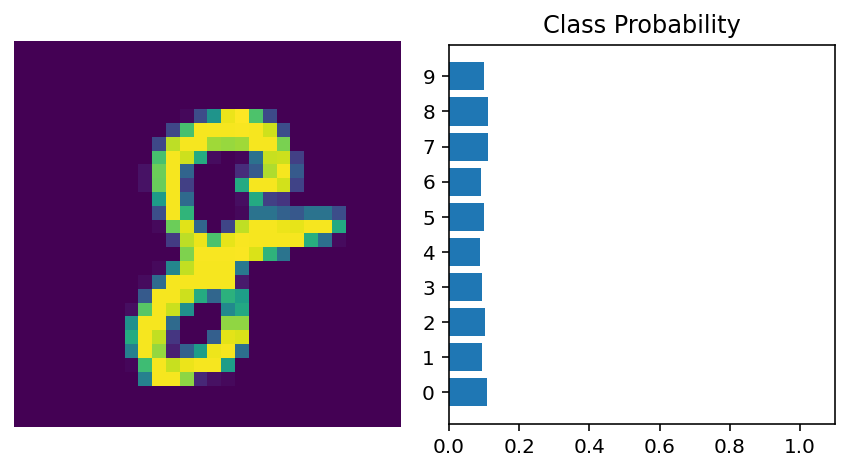

In [22]:
import helper
helper.view_classify(img.view(1, 28, 28), ps)

In [35]:
model = nn.Sequential(nn.Linear(784,128),
nn.ReLU(),
nn.Linear(128,64),
nn.ReLU(), 
nn.Linear(64,10),
nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [36]:

print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0282,  0.0308,  0.0353,  ...,  0.0032,  0.0153, -0.0199],
        [-0.0355, -0.0091,  0.0116,  ..., -0.0217,  0.0298,  0.0149],
        [ 0.0155, -0.0095,  0.0327,  ...,  0.0135, -0.0061, -0.0322],
        ...,
        [-0.0012, -0.0095,  0.0008,  ..., -0.0220,  0.0069, -0.0244],
        [-0.0291,  0.0257, -0.0217,  ...,  0.0309,  0.0353, -0.0278],
        [-0.0083,  0.0330,  0.0024,  ..., -0.0289, -0.0221, -0.0281]],
       requires_grad=True)

You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [38]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [40]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
